# Notebook content 
* Loading GMD dataset
* Playing example audio
* Dataset statistics before and after discarding samples
* Extracting features
* Training XGBoost model for beat detection

### Import packages

In [3]:
import os
import sys

import matplotlib.pyplot as plt

sys.path.append(os.path.join("..", "src"))

from data_loader import GmdDataLoader
from feat_extractor import DrumFreqFeatExtractor
import IPython.display

### Define paths

In [4]:
data_root_path = os.path.join("..", "data")
dataset_root_path = os.path.join(data_root_path, "groove")

### Define constants 

In [5]:
min_duration = 30.0

### Create generator for audio files

In [6]:
groove_data_loader = GmdDataLoader(dataset_root_path)

In [7]:
train_data_generator = groove_data_loader.get_data(split=GmdDataLoader.TRAIN_SPLIT, min_duration=min_duration)

### Get dataset statistics

In [8]:
original_n = groove_data_loader.get_dataset_size()
original_train_n = groove_data_loader.get_dataset_size(split="train")
original_test_n = groove_data_loader.get_dataset_size(split="test")
print("Number of samples before discarding stage - Total samples: {} - Training samples: {} - Test samples: {}"
     .format(original_n, original_train_n, original_test_n))
original_n = groove_data_loader.get_dataset_size(min_duration = min_duration)
original_train_n = groove_data_loader.get_dataset_size(split="train", min_duration = min_duration)
original_test_n = groove_data_loader.get_dataset_size(split="test", min_duration = min_duration)
print("Number of samples after discarding stage - Total samples: {} - Training samples: {} - Test samples: {}"
     .format(original_n, original_train_n, original_test_n))

Number of samples before discarding stage - Total samples: 1150 - Training samples: 897 - Test samples: 129
Number of samples after discarding stage - Total samples: 346 - Training samples: 250 - Test samples: 55


### Play one of the training audio files

In [9]:
y, meta_data, start_time = next(train_data_generator)
print("First beat detected on {}".format(start_time))
print("Sampling rate: {}".format(groove_data_loader.sr))
IPython.display.Audio(data=y, rate=groove_data_loader.sr)

First beat detected on 2.115625
Sampling rate: 22050


### Extract onset features from training audio file and visualize them

We use STFT and calculate the spectral difference in separate frequency bands. Then we use the same approach as in Hainsworth where a variable size matrix H is used to transform observations to states.

#### Visualize waveform

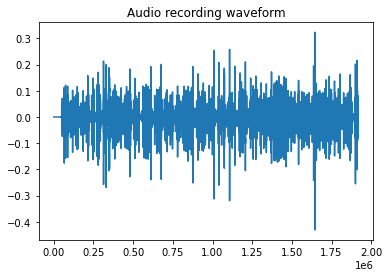

In [10]:
plt.title("Audio recording waveform")
plt.plot(y)
plt.show()

#### Extract beat features